Text(0,0.5,'Test2')

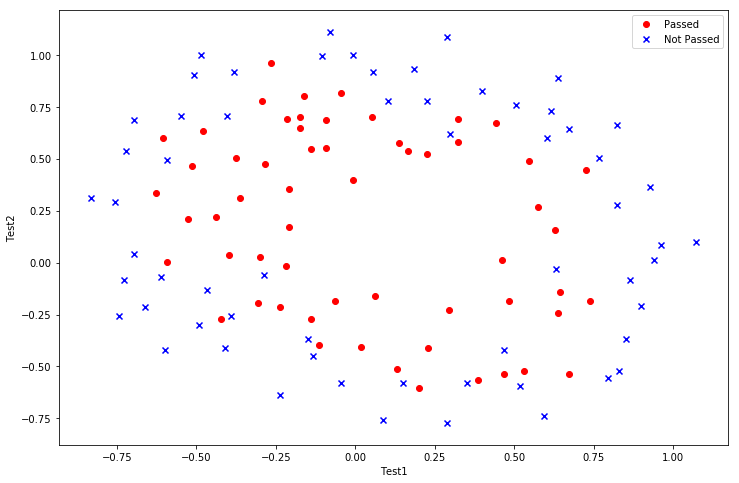

In [10]:
import os
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
path = os.getcwd() + '/git/data/ex2data2.txt'

data = pd.read_csv(path, header = None, names = ['Test1','Test2','Result'])

data.insert(0,"ones",1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.array([0,0,0])
postive = data[data["Result"].isin([1])]
negative = data[data["Result"].isin([0])]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(postive['Test1'],postive['Test2'], c = 'r', marker = 'o', label = "Passed")
ax.scatter(negative['Test1'],negative['Test2'], c = 'b', marker = 'x', label = "Not Passed")
ax.legend()
ax.set_xlabel("Test1")
ax.set_ylabel("Test2")


In [12]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

def costFunction(theta,X,y,reg):
    term1 = (-1)/len(X)*(np.log(sigmoid(np.dot(X,theta))).T.dot(y) + np.log((1- sigmoid(X.dot(theta)))).T.dot(1-y))
    reg_term = (reg/(2*len(X)))*(np.sum(np.square(theta[1:])))
    final = term1 + reg_term
    return final[0]

def gradient(theta,X,y,reg):
    theta = np.reshape(theta,(theta.size,1))
    h = sigmoid(np.dot(X,theta))
    term = (1/len(X))*(np.dot(X.T,(h - y)))
    term[1:] = term[1:] + reg*theta[1:]/len(X)
    return term.flatten()
# gradient(theta,X,y,reg = 0.3)
reg = 1
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return p.astype('int')



In [42]:
p = PolynomialFeatures(6)
poly = p.fit_transform(data.iloc[:,1:3])
reg = 1


In [37]:
initial_theta = np.zeros(poly.shape[1])

In [38]:
for i, reg in enumerate([0,1,10,15,30,45,55,65,75,85,100]):
    reg = reg
    result = opt.minimize(costFunction, initial_theta, args=(poly, y, reg), 
                  method= None, jac=gradient, options={'maxiter':10000})
    accuracy = 100.0*sum(predict(result.x, poly) == np.ravel(y))/y.size    
    print('Accuracy for regularization= %f is %f'%(reg,accuracy))    

Accuracy for regularization= 0.000000 is 91.525424
Accuracy for regularization= 1.000000 is 83.050847
Accuracy for regularization= 10.000000 is 74.576271
Accuracy for regularization= 15.000000 is 69.491525
Accuracy for regularization= 30.000000 is 67.796610
Accuracy for regularization= 45.000000 is 68.644068
Accuracy for regularization= 55.000000 is 66.101695
Accuracy for regularization= 65.000000 is 64.406780
Accuracy for regularization= 75.000000 is 64.406780
Accuracy for regularization= 85.000000 is 63.559322
Accuracy for regularization= 100.000000 is 61.016949
